# Trabajo Práctico 6: Colores

## Segmentación de imágenes usando espacios de color

### Bird

In [116]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

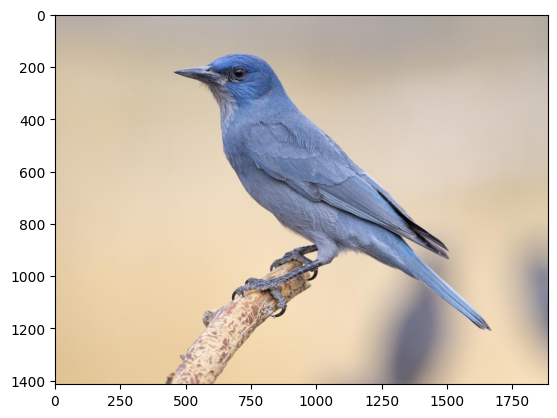

In [117]:
bird = cv2.imread("images/bird.jpg")
bird = cv2.cvtColor(bird, cv2.COLOR_BGR2RGB)
plt.imshow(bird)
plt.show()

Visualización en espacio RGB

KeyboardInterrupt: 

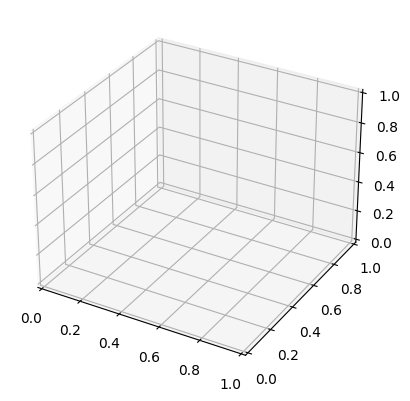

In [118]:
r, g, b = cv2.split(bird)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = bird.reshape((np.shape(bird)[0]*np.shape(bird)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Visualización en espacio HSV

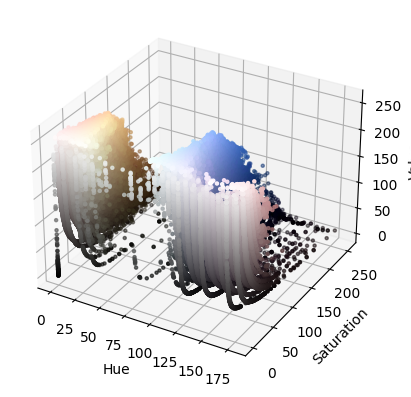

In [ ]:
hsv_bird = cv2.cvtColor(bird, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_bird)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

Estableciendo dos colores nos quedamos con una "caja" es el espacio HSV, de forma que podemos aislar los tonos azules del pájaro.

In [ ]:
light_blue = (100, 45, 0)
dark_blue = (125, 255, 255)

In [ ]:
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

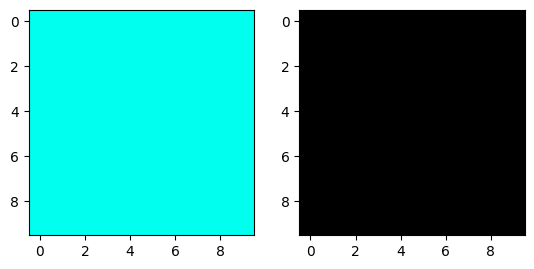

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

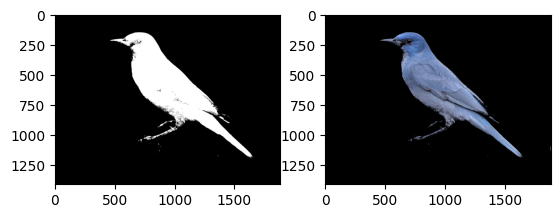

In [ ]:
mask = cv2.inRange(hsv_bird, light_blue, dark_blue)
result = cv2.bitwise_and(bird, bird, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

plt.imsave("images/bird_segm.jpg", result)

### Rosa

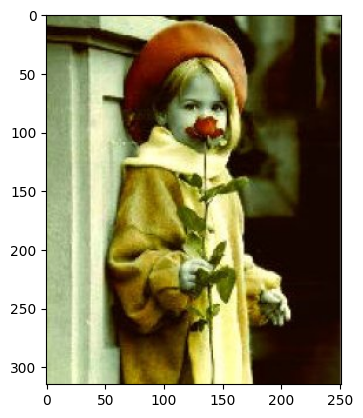

In [221]:
rose = cv2.imread("images/Girl_and_rose.jpg")
rose = cv2.cvtColor(rose, cv2.COLOR_BGR2RGB)
plt.imshow(rose)
plt.show()

Visualización en espacio RGB

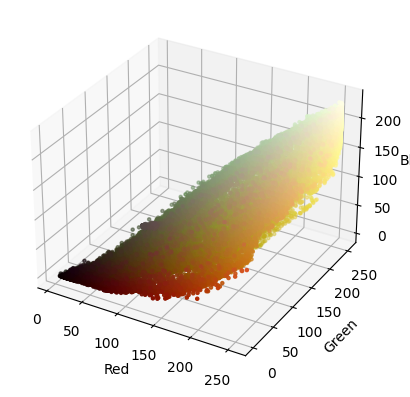

In [222]:
r, g, b = cv2.split(rose)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = rose.reshape((np.shape(rose)[0]*np.shape(rose)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Visualización en espacio HSV

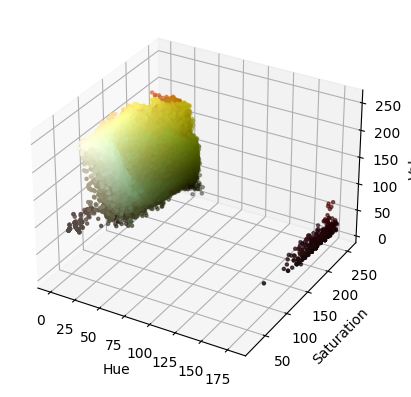

In [223]:
hsv_rose = cv2.cvtColor(rose, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_rose)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

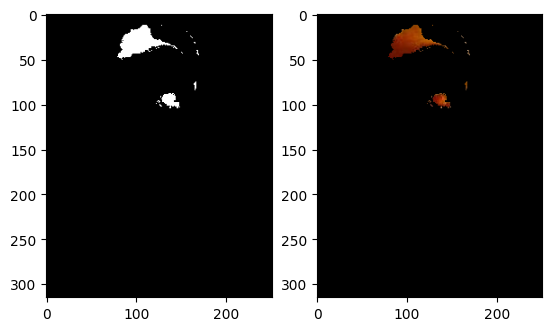

In [276]:
light_red = (0, 0, 100)
dark_red = (15, 255, 255)

mask = cv2.inRange(hsv_rose, light_red, dark_red)
result = cv2.bitwise_and(rose, rose, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

plt.imsave("images/rose_segm.jpg", result)